In [15]:
# MNIST

In [16]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

# Define a function that will be used later
def display_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm).plot()

(10000, 784)
(10000,)
True label for the plotted image is 4


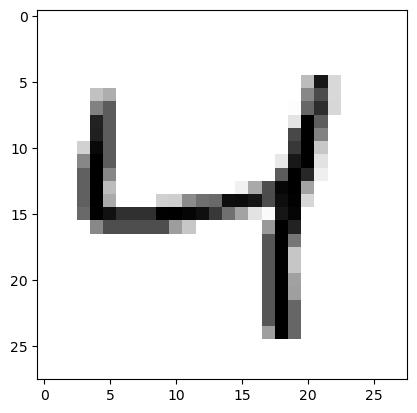

In [17]:
# Load data and inspect it
mnist = fetch_openml('mnist_784', version=1, cache=True,
                    as_frame=False)
# print(mnist.DESCR)

X = mnist["data"][:10000]
y = mnist["target"][:10000].astype(np.uint8)
print(X.shape)
print(y.shape)

some_digit = X[2]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
print("True label for the plotted image is", y[2])

# print(mnist.DESCR)

In [18]:
# Splitting data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=2000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=2000, random_state=42)

# Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
x_test = scaler.transform(X_test)

In [19]:
logreg_clf = LogisticRegression(max_iter=1000)
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

named_estimators = [
    ("logreg_clf", logreg_clf),
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf)
]

voting_clf = VotingClassifier(named_estimators, voting='hard')

models = [logreg_clf, random_forest_clf, extra_trees_clf, voting_clf]
for model in models:
    model.fit(X_train, y_train)

print("Accuracy for each model")
model_names = ["Logistic Regression", "Random Forest", "Extra Trees", "Voting Classifier"]
for name, model in zip(model_names, models):
    score = model.score(X_val, y_val)
    print(f"{name:20s}: {score:.4f}")

Accuracy for each model
Logistic Regression : 0.8800
Random Forest       : 0.9380
Extra Trees         : 0.9400
Voting Classifier   : 0.9395


              precision    recall  f1-score   support

           0       0.96      0.93      0.95       217
           1       0.96      0.95      0.95       217
           2       0.82      0.83      0.82       190
           3       0.91      0.84      0.88       218
           4       0.92      0.87      0.90       215
           5       0.81      0.86      0.83       160
           6       0.90      0.92      0.91       197
           7       0.87      0.87      0.87       210
           8       0.81      0.84      0.82       183
           9       0.83      0.88      0.85       193

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



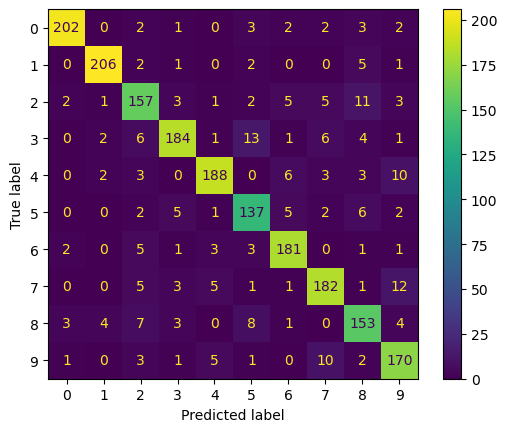

In [30]:
# Logistic Regression. Evaluate it on the validation data
et_pred_val = logreg_clf.predict(X_val)
display_confusion_matrix(y_val, et_pred_val)
print(classification_report(y_val, et_pred_val))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       217
           1       0.97      0.98      0.97       217
           2       0.92      0.93      0.92       190
           3       0.93      0.90      0.92       218
           4       0.94      0.93      0.94       215
           5       0.97      0.90      0.93       160
           6       0.95      0.97      0.96       197
           7       0.95      0.93      0.94       210
           8       0.91      0.90      0.90       183
           9       0.88      0.96      0.92       193

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



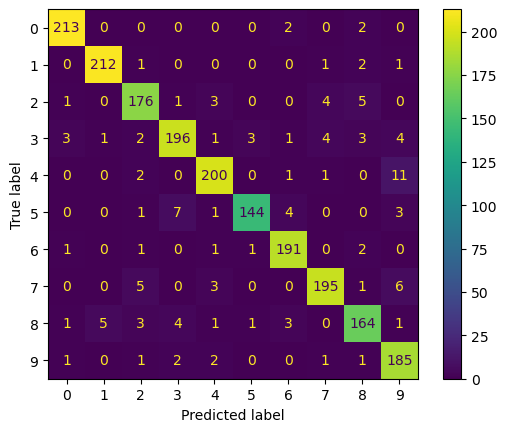

In [31]:
# Random Forest. Evaluate it on the validation data
et_pred_val = random_forest_clf.predict(X_val)
display_confusion_matrix(y_val, et_pred_val)
print(classification_report(y_val, et_pred_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       217
           1       1.00      1.00      1.00       217
           2       1.00      1.00      1.00       190
           3       1.00      1.00      1.00       218
           4       1.00      1.00      1.00       215
           5       1.00      1.00      1.00       160
           6       1.00      1.00      1.00       197
           7       1.00      1.00      1.00       210
           8       1.00      1.00      1.00       183
           9       1.00      1.00      1.00       193

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



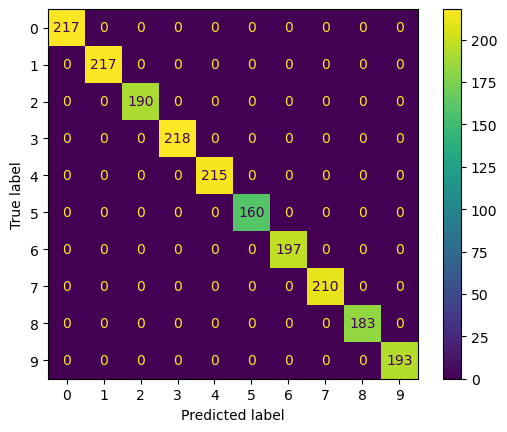

In [32]:
# Extra Trees. Evaluate it on the validation data
et_pred_val = extra_trees_clf.predict(X_val)
display_confusion_matrix(y_val, et_pred_val)
print(classification_report(y_val, et_pred_val))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       217
           1       0.98      0.98      0.98       217
           2       0.89      0.92      0.91       190
           3       0.94      0.89      0.92       218
           4       0.96      0.93      0.95       215
           5       0.94      0.91      0.92       160
           6       0.96      0.97      0.96       197
           7       0.95      0.93      0.94       210
           8       0.91      0.92      0.92       183
           9       0.88      0.94      0.91       193

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



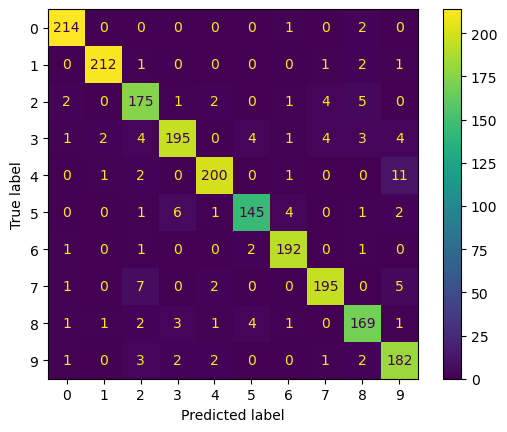

In [33]:
# Voting Classifier. Evaluate it on the validation data
et_pred_val = voting_clf.predict(X_val)
display_confusion_matrix(y_val, et_pred_val)
print(classification_report(y_val, et_pred_val))

In [35]:
# Logistic Regression

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       207
           1       0.91      0.94      0.93       216
           2       0.88      0.79      0.83       204
           3       0.81      0.86      0.84       192
           4       0.95      0.85      0.90       211
           5       0.97      0.38      0.55       176
           6       0.93      0.93      0.93       220
           7       0.97      0.81      0.88       216
           8       0.56      0.92      0.70       166
           9       0.74      0.94      0.83       192

    accuracy                           0.84      2000
   macro avg       0.87      0.84      0.83      2000
weighted avg       0.87      0.84      0.84      2000



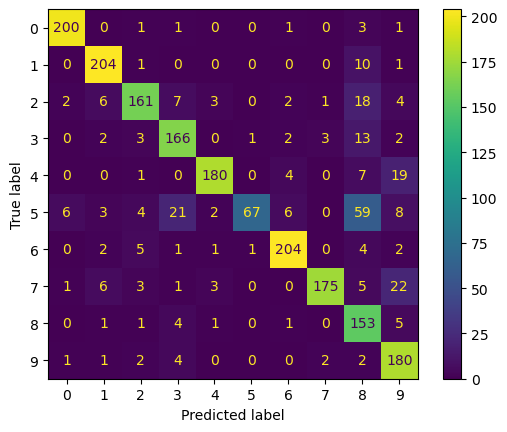

In [34]:
# Refit model on train + validation data
X_train_val = scaler.fit_transform(X_train_val)
logreg_clf.fit(X_train_val, y_train_val)

# Evaluate it on test data
et_pred_test = logreg_clf.predict(X_test)
display_confusion_matrix(y_test, et_pred_test)
print(classification_report(y_test, et_pred_test, zero_division=0))

In [ ]:
# Random Forest

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       207
           1       0.00      0.00      0.00       216
           2       0.96      0.62      0.75       204
           3       0.87      0.48      0.62       192
           4       0.90      0.18      0.30       211
           5       1.00      0.01      0.01       176
           6       0.98      0.56      0.71       220
           7       0.00      0.00      0.00       216
           8       0.12      1.00      0.22       166
           9       0.67      0.06      0.11       192

    accuracy                           0.38      2000
   macro avg       0.64      0.39      0.36      2000
weighted avg       0.64      0.38      0.37      2000



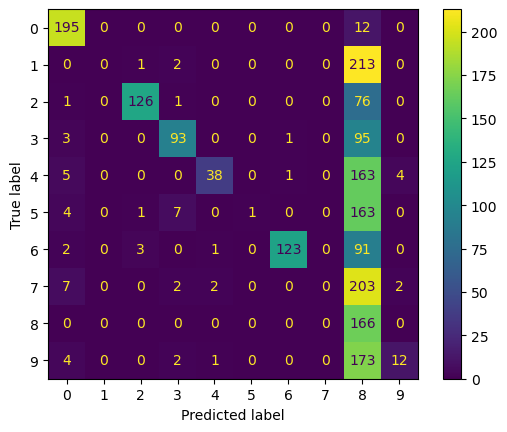

In [39]:
# Refit model on train + validation data
X_train_val = scaler.fit_transform(X_train_val)
random_forest_clf.fit(X_train_val, y_train_val) 

# Evaluate it on test data
et_pred_test = extra_trees_clf.predict(X_test)
display_confusion_matrix(y_test, et_pred_test)
print(classification_report(y_test, et_pred_test, zero_division=0))

In [37]:
# Extra Trees

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       207
           1       0.00      0.00      0.00       216
           2       0.96      0.62      0.75       204
           3       0.87      0.48      0.62       192
           4       0.90      0.18      0.30       211
           5       1.00      0.01      0.01       176
           6       0.98      0.56      0.71       220
           7       0.00      0.00      0.00       216
           8       0.12      1.00      0.22       166
           9       0.67      0.06      0.11       192

    accuracy                           0.38      2000
   macro avg       0.64      0.39      0.36      2000
weighted avg       0.64      0.38      0.37      2000



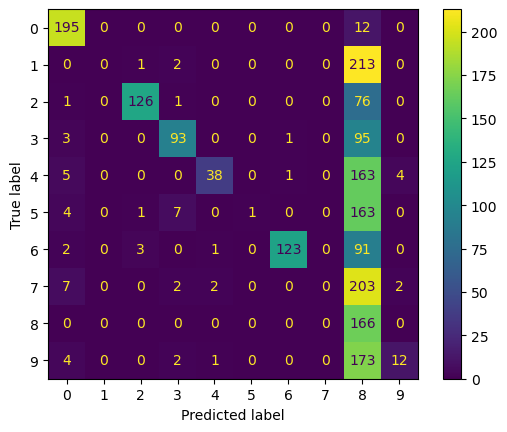

In [38]:
# Refit model on train + validation data
X_train_val = scaler.fit_transform(X_train_val)
extra_trees_clf.fit(X_train_val, y_train_val) 

# Evaluate it on test data
et_pred_test = extra_trees_clf.predict(X_test)
display_confusion_matrix(y_test, et_pred_test)
print(classification_report(y_test, et_pred_test, zero_division=0))

In [ ]:
# Voting Classifier

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       207
           1       0.00      0.00      0.00       216
           2       0.96      0.62      0.75       204
           3       0.87      0.48      0.62       192
           4       0.90      0.18      0.30       211
           5       1.00      0.01      0.01       176
           6       0.98      0.56      0.71       220
           7       0.00      0.00      0.00       216
           8       0.12      1.00      0.22       166
           9       0.67      0.06      0.11       192

    accuracy                           0.38      2000
   macro avg       0.64      0.39      0.36      2000
weighted avg       0.64      0.38      0.37      2000



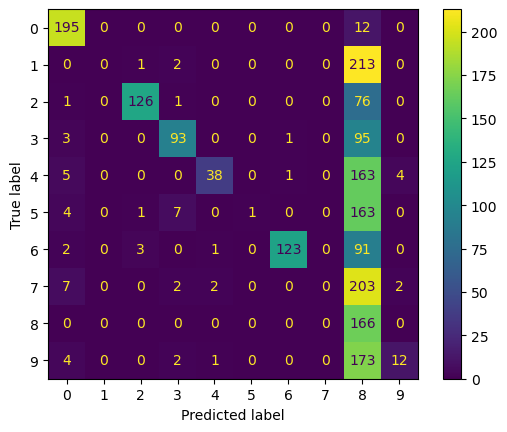

In [40]:
# Refit model on train + validation data
X_train_val = scaler.fit_transform(X_train_val)
voting_clf.fit(X_train_val, y_train_val) 

# Evaluate it on test data
et_pred_test = extra_trees_clf.predict(X_test)
display_confusion_matrix(y_test, et_pred_test)
print(classification_report(y_test, et_pred_test, zero_division=0))

In [22]:
scaler_2 = StandardScaler()
X = scaler_2.fit_transform(X)
extra_trees_clf.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


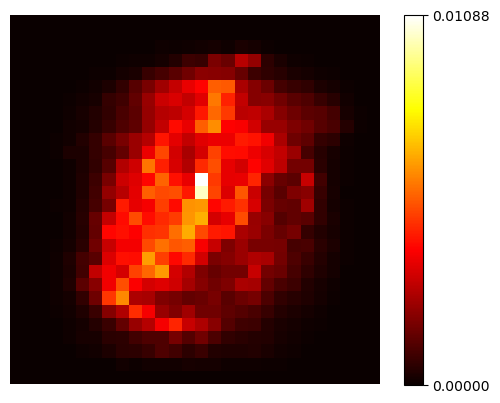

In [23]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap=mpl.cm.hot, interpolation="nearest")
    plt.axis("off")

plot_digit(extra_trees_clf.feature_importances_)

cbat = plt.colorbar(ticks=[extra_trees_clf.feature_importances_.min(), extra_trees_clf.feature_importances_.max()])